# Problem definition:
  - Automate the loan eligibility process (real time) based on customer detail provided while filling online application form

#### Project's librairies

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2

1. ### Explore data:
  - **Data importation & Variable Identification**
  

In [2]:
data = pd.read_csv('/Users/macos/Desktop/train_ctrUa4K.csv')
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [63]:
categorical_features  = data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']].copy()
numerical_features  = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].copy()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


 - **Univariate Analysis**
   - "CountinuousVariableExploration" class : initializer's takes a continuous variable and its name as arguments and provide methods to compute and visualize the **tendecy** and **spread** of the variable.


In [5]:
class CountinuousVariableExploration:
    
    def __init__(self, variable, name):
        self.variable = variable
        self.var_name = name
        
    def tendecy_measures(self):
        print("        TENDECY MEASURES")
        print("Mean :")
        print(self.variable.mean())
        print("Median :")
        print(self.variable.median())
        print("Mode :")
        print(self.variable.mode())
        print("Min :")
        print(self.variable.min())
        print("Max :")
        print(self.variable.max())
        
    def measure_of_dispersion(self):
        print("        DISPERSION MEASURE")
        print("Range")
        print(self.variable.max()-self.variable.min())
        print("Quantiles : ")
        print(self.variable.quantile([.25, .5, .75]))
        print("Interquantile range :")
        iqr = self.variable.quantile(.75)-self.variable.quantile(.25)
        print(iqr)
        print("Variance :")
        print(self.variable.var())
        print("Standard Deviation :")
        print(self.variable.std())
        print("Lower inner fence :")
        qar = list(self.variable.quantile([.25, .5, .75]))
        print(qar[0]-1.5*iqr)
        print("Upper inner fence :")
        print(qar[2]+1.5*iqr)
        print("Lower outer fence :")
        print(qar[0]-3*iqr)
        print("Upper outer fence :")
        print(qar[2]+3*iqr)
        print("\n")
        
    
    def variable_visualization(self):

        def split_to_quartiles_arrays(arr):
            vals = list(arr.quantile([.25, .5, .75]))
            quartiles = []
            quartiles.append(arr[arr<vals[0]])
            mask = (arr>vals[0]) & (arr<vals[1])
            quartiles.append(arr[mask])
            mask = (arr>vals[1]) & (arr<vals[2])
            quartiles.append(arr[mask])
            quartiles.append(arr[arr>vals[2]])
            return quartiles
        
        plt.hist(x=self.variable, bins=50, color='red', alpha=0.7, rwidth=0.85)
        plt.title(self.var_name)
        
        
        quartiles = split_to_quartiles_arrays(self.variable)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(self.var_name + ' quartiles histograms')
        ax1.hist(x=quartiles[0], bins=50, color='magenta', alpha=0.7, rwidth=0.85)
        ax2.hist(x=quartiles[1], bins=50, color='orange', alpha=0.7, rwidth=0.85)
        ax3.hist(x=quartiles[2], bins=50, color='orange', alpha=0.7, rwidth=0.85)
        ax4.hist(x=quartiles[3], bins=50, color='brown', alpha=0.7, rwidth=0.85)
        
        
    
    def conclusions(self):
        # Standard deviation : spread of the data from the mean
        # Normaly all of the data should be in the range [mean ±Standard deviation]
        # print the percentage of data that doesn't sit in this range
        mean = self.variable.mean()
        standard_deviation = self.variable.std()
        data_in_range = self.variable[(self.variable > mean-3*standard_deviation) & (self.variable < mean+3*standard_deviation)]
        print("{}% of data sit in the range(mean ± 3*standard_deviation) : [{}, {}]".format(len(data_in_range)/len(self.variable), mean-3*standard_deviation, mean+3*standard_deviation))
        qar = list(self.variable.quantile([.25, .5, .75]))
        iqr = qar[2]-qar[0]
        weak_outliers = self.variable[(self.variable > qar[0]-1.5*iqr) & (self.variable < qar[2]+1.5*iqr)]
        print("{}% of data are weak outliers".format(1 - len(weak_outliers)/len(self.variable)))
        strong_outliers = self.variable[(self.variable > qar[0]-3*iqr) & (self.variable < qar[2]+3*iqr)]
        print("{}% of data are strong outliers".format(1 - len(strong_outliers)/len(self.variable)))

        TENDECY MEASURES
Mean :
5403.459283387622
Median :
3812.5
Mode :
0    2500
dtype: int64
Min :
150
Max :
81000
        DISPERSION MEASURE
Range
80850
Quantiles : 
0.25    2877.5
0.50    3812.5
0.75    5795.0
Name: ApplicantIncome, dtype: float64
Interquantile range :
2917.5
Variance :
37320390.167181164
Standard Deviation :
6109.041673387174
Lower inner fence :
-1498.75
Upper inner fence :
10171.25
Lower outer fence :
-5875.0
Upper outer fence :
14547.5




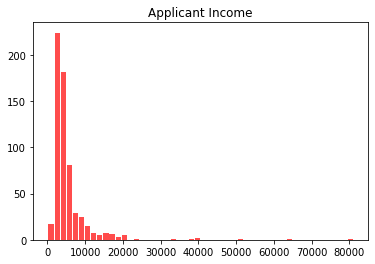

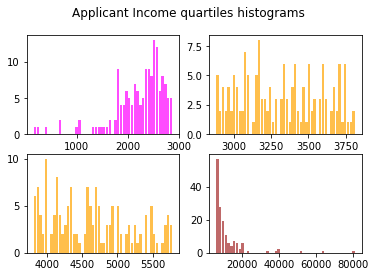

In [6]:
continuous_exploration = CountinuousVariableExploration(data.ApplicantIncome, 'Applicant Income')
continuous_exploration.tendecy_measures()
continuous_exploration.measure_of_dispersion()
continuous_exploration.variable_visualization()

   - "CategoricalVariableExploration" class : initializer's takes a ordinal variable and its name as arguments and  visualizes(count) the variable.

In [8]:
class CategoricalVariableExploration:
    
    def __init__(self, variable, variable_name):
        self.variable = variable
        self.variable_name = variable_name
        
    
    def variable_visualization(self):
        bar = self.variable.value_counts().plot.bar()
        bar.title.set_text("{}'s Bar chart".format(self.variable_name))

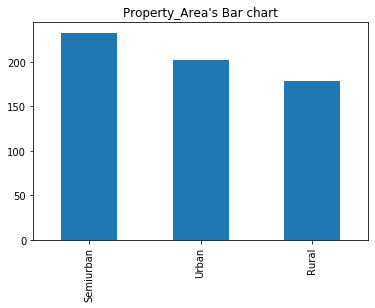

In [10]:
categorical = CategoricalVariableExploration(data.Property_Area, "Property_Area")
categorical.variable_visualization()

 - **Bivariate Analysis**
   - **Continuous & continuous**


In [11]:
class COOCBIVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
        
    
    def scatter_vars(self):
        plt.scatter(self.var1, self.var2)
        plt.xlabel(self.var1_name)
        plt.ylabel(self.var2_name)
        plt.show()
        
    def pearson_correlation(self):
        print("Pearson's correlation ")
        print(self.var1.corr(self.var2, method ='pearson'))
    
    def conclusions(self):
        corr = self.var1.corr(self.var2, method ='pearson')
        print("Pearson's correlation ")
        print(corr)
        if corr <=-1 and corr >=-0.5:
            print("Strong negative linear relationship between {} and {}".format(self.var1_name, self.var2_name))
        elif corr>=0.5 and corr<=1:
            print("Strong positive linear relationship between {} and {}".format(self.var1_name, self.var2_name))
        else :
            print("No linear relationship between {} and {}".format(self.var1_name, self.var2_name))

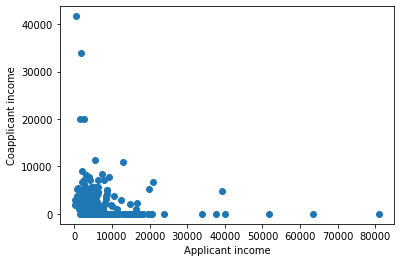

Pearson's correlation 
-0.11660458122889968
No linear relationship between Applicant income and Coapplicant income


In [13]:
cv  = COOCBIVARIATE(data.ApplicantIncome, data.CoapplicantIncome, "Applicant income", "Coapplicant income")
cv.scatter_vars()
cv.conclusions()

   - **Categorical and categorical**

In [179]:
class CAACBIVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
        self.crosstab = pd.crosstab(self.var1, self.var2)
      
    
    def chi_square(self, prob = 0.95):
        stat, p, dof, expected = chi2_contingency(self.crosstab)
        # interpret test-statistic
        critical = chi2.ppf(prob, dof)
        print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            print('{} & {} are Dependent'.format(self.var1_name, self.var2_name))
        else:
            print('{} & {} are Independent'.format(self.var1_name, self.var2_name))
        # interpret p-value
        alpha = 1.0 - prob
        print('significance=%.3f, p=%.3f' % (alpha, p))
        if p <= alpha:
            print('{} & {} are Dependent'.format(self.var1_name, self.var2_name))
        else:
            print('{} & {} are Independent'.format(self.var1_name, self.var2_name))
    
    def f_score(self):
        pass
    
    def crosstab(self):
        print(self.crosstab)
        self.crosstab.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
probability = 0.950, critical = 5.991, stat = 12.298
Property_Area & Loan_Status are Dependent
significance=0.050, p=0.002
Property_Area & Loan_Status are Dependent


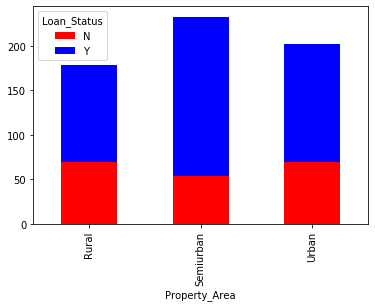

In [182]:
t = CAACBIVARIATE(data.Property_Area, data.Loan_Status, data.Property_Area.name, data.Loan_Status.name)
t.crosstab()
t.chi_square()